# *Analyse des données issues de commentaires sur la plateforme Reddit*

Ce notebook a pour objectif de réaliser une analyse exploratoire des données textuelles collectées depuis Reddit.

### Étapes de l’analyse

- Étude de l’évolution temporelle des types de commentaires en fonction des sujets abordés ;
- Analyse des sentiments et visualisation des résultats selon les catégories de sentiments :
  - Nuage de mots ;
  - Diagrammes thématiques des sujets traités.

### Dépendances

Ce projet utilise les bibliothèques suivantes :

- pandas : manipulation de données ;
- matplotlib : visualisation graphique ;
- datetime : gestion des dates ;
- seaborn : visualisation statistique.
- workloud : Nuage de mots
- textblob :Analyse de sentiment  

# Importation des packages

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Importation des bases de données

In [4]:
df=pd.read_csv('/content/df_comments_posts.csv',delimiter=",")

In [5]:
df.head()

,post_id,subreddit,created_utc,post_title,link_flair_text,comment
0,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""https://x.com/AuthorJMac/status/1773871445669..."
1,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"> So, just to clarify. This post isn't about w..."
2,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,If AI could do/explain my taxes this would be ...
3,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""I agree, but AI won't prevent you from doing ..."
4,1d6iggo,artificial,1.717349e+09,What are your thoughts on the following statem...,Discussion,"""People are taking this quite literally, but I..."


In [6]:
df['date']=df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))

# Description des données

In [7]:
df.describe()

,created_utc,date
count,1.013000e+04,10130
mean,1.642163e+09,2022-01-14 12:26:56.021224192
min,1.489442e+09,2017-03-13 21:51:18
25%,1.601203e+09,2020-09-27 10:31:57
50%,1.636632e+09,2021-11-11 11:52:13
75%,1.676036e+09,2023-02-10 13:32:53
max,1.743171e+09,2025-03-28 14:05:04
std,5.680794e+07,NaN


In [9]:
df.describe(include='object')

,post_id,subreddit,post_title,link_flair_text,comment
count,10130,10130,10130,9900,10129
unique,84,4,83,16,9550
top,ma8xbq,MachineLearning,[D] Types of Machine Learning Papers,Discussion,[deleted]
freq,242,5000,343,3115,220


In [8]:
df['date'].describe()

,date
count,10130
mean,2022-01-14 12:26:56.021224192
min,2017-03-13 21:51:18
25%,2020-09-27 10:31:57
50%,2021-11-11 11:52:13
75%,2023-02-10 13:32:53
max,2025-03-28 14:05:04


Evolution du nombre de commentaire par année pour chaque subreddit dans un même graphe

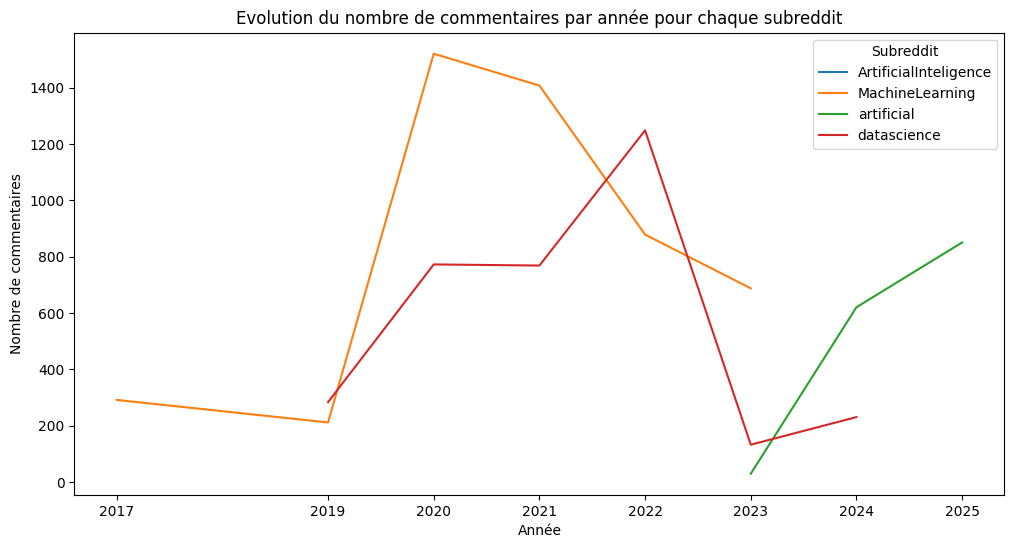

In [10]:
# Extrayons year de la date
df['year'] = df['date'].dt.year

# Group by subreddit and year, then count the number of comments
comment_counts = df.groupby(['subreddit', 'year'])['post_id'].count().reset_index()
comment_counts.rename(columns={'post_id': 'comment_count'}, inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='comment_count', hue='subreddit', data=comment_counts)
plt.title('Evolution du nombre de commentaires par année pour chaque subreddit')
plt.xlabel('Année')
plt.ylabel('Nombre de commentaires')
plt.xticks(comment_counts['year'].unique()) # Ensure all years are displayed on x-axis
plt.legend(title='Subreddit')
plt.show()


A partir de 2022, le Machine learning et la data science commence à perdre l'interet des gens au profit de l'intélligence artificielle

## Nombre de posts par thème

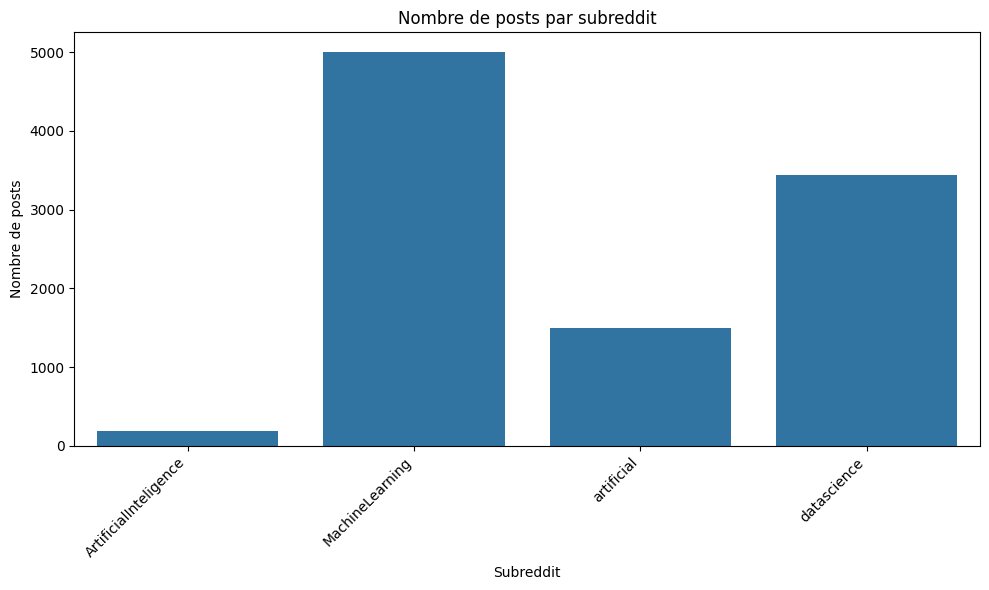

In [11]:
# Groupons les thèmes
subreddit_post_counts = df.groupby('subreddit')['post_id'].count().reset_index()
subreddit_post_counts.rename(columns={'post_id': 'post_count'}, inplace=True)


# Le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='subreddit', y='post_count', data=subreddit_post_counts)
plt.title('Nombre de posts par subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Nombre de posts')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


Ce graphique suggère que la data science attire le plus de posts suivi de l'intelligence artificiel. Le deeplearning est un sujet rarement posté sur Reddit

# Analyse des sentiments

In [12]:

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [13]:
# Analyse des sentiments pour les posts

df['sentiment'] = df['comment'].astype(str).apply(analyze_sentiment)

In [14]:

# Analyse des sentiments pour les posts
df['post_sentiment'] = df['post_title'].astype(str).apply(analyze_sentiment)

In [15]:

print(df[['comment', 'sentiment', 'post_title', 'post_sentiment']].head()) # Show first few rows

                                             comment  sentiment  \
0  "https://x.com/AuthorJMac/status/1773871445669...   0.000000   
1  > So, just to clarify. This post isn't about w...   0.000000   
2  If AI could do/explain my taxes this would be ...   0.800000   
3  "I agree, but AI won't prevent you from doing ...  -0.333333   
4  "People are taking this quite literally, but I...   0.091667   

                                          post_title  post_sentiment  
0  What are your thoughts on the following statem...             0.0  
1  What are your thoughts on the following statem...             0.0  
2  What are your thoughts on the following statem...             0.0  
3  What are your thoughts on the following statem...             0.0  
4  What are your thoughts on the following statem...             0.0  


In [19]:

def categorie_sentiment(sentiment_score):
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

df['type_commentaire'] = df['sentiment'].apply(categorie_sentiment)
len(df[df['type_commentaire']=='Negative'])/len(df)

0.1489634748272458

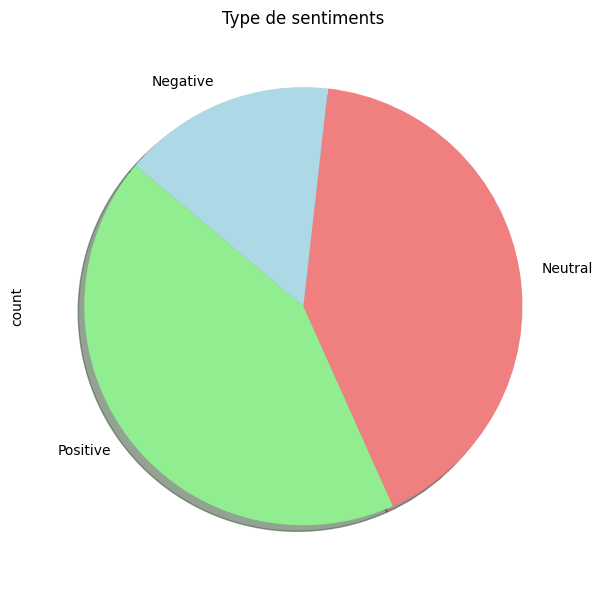

In [ ]:
type_commentaire_count=df['type_commentaire'].value_counts()
colors = ['lightgreen', 'lightcoral','lightblue']

plt.figure(figsize=(10, 6))
figur=type_commentaire_count.plot(kind="pie", colors=colors, shadow=True, startangle=140)
plt.title('Type de sentiments')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Ce diagramme circulaire montre que les utilisateurs expriment rarement des commentaires négatifs(14,90 % des commentaires). A l'opposé, les commentaires neutres et positifs sont très fréquents

In [21]:
#
positive_comments = df[df['sentiment'] > 0]
negative_comments = df[df['sentiment'] < 0]

In [22]:

print("\nNumber of positive comments:", len(positive_comments))
print("Number of negative comments:", len(negative_comments))



Number of positive comments: 4206
Number of negative comments: 1509


In [23]:
positive_text = " ".join(positive_comments['comment'].astype(str))

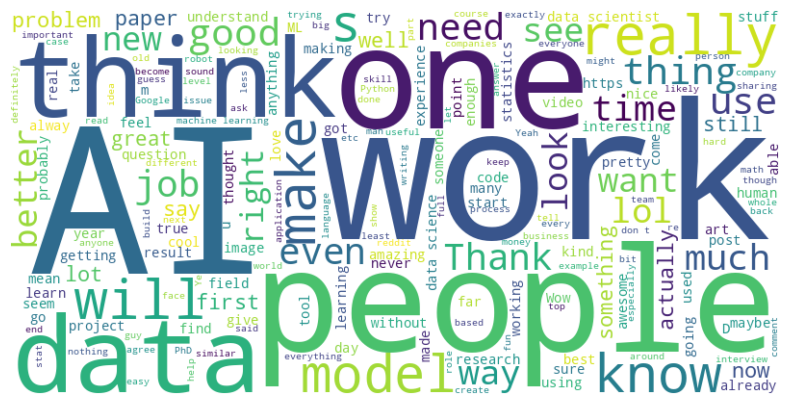

In [24]:

wordcloud_pos = WordCloud(width=800, height=400, background_color="white", stopwords=None).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()


In [25]:
negative_text = " ".join(negative_comments['comment'].astype(str))


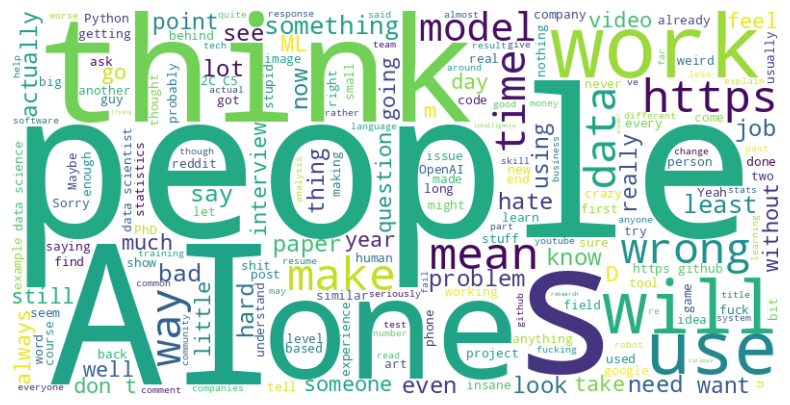

In [26]:

wordcloud_neg = WordCloud(width=800, height=400, background_color="white", stopwords=None).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

La répartion des commentaires selon la nature des sentiments des commentateurs

In [28]:
# Fonction pour les graphiques
def repartition_subreddit(base, base_name):
    color = ['lightgreen', 'lightcoral','lightblue', "lightyellow"]
    subreddit_counts = base['subreddit'].value_counts()
    plt.figure(figsize=(10, 6))
    figur=subreddit_counts.plot(kind="pie", colors=color, shadow=True)
    plt.title(f'Repartition des commentaires par theme de la base {base_name}')
    plt.tight_layout()
    plt.show()
    return subreddit_counts, figur


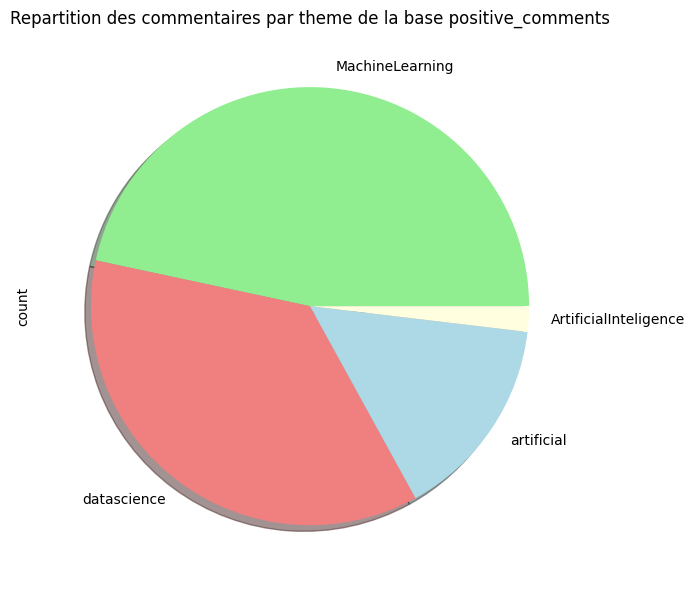

(subreddit
 MachineLearning          1962
 datascience              1529
 artificial                636
 ArtificialInteligence      79
 Name: count, dtype: int64,
 <Axes: title={'center': 'Repartition des commentaires par theme de la base positive_comments'}, ylabel='count'>)

In [29]:
repartition_subreddit(positive_comments,"positive_comments")

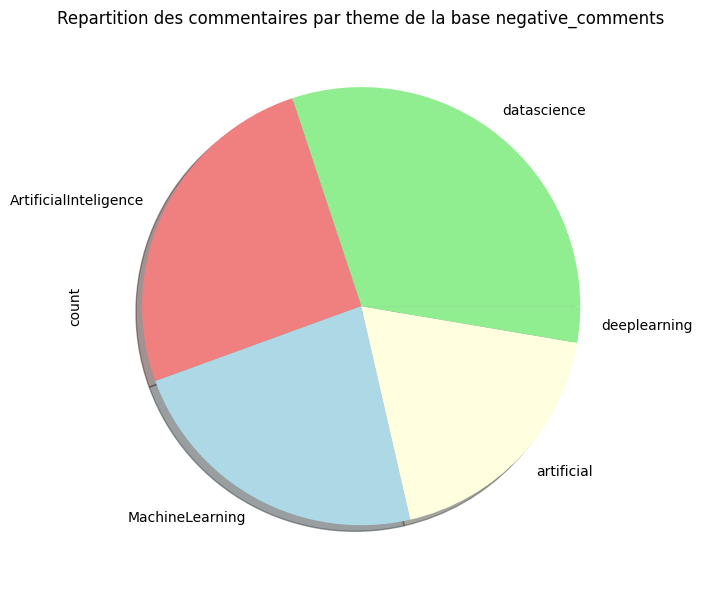

(subreddit
 datascience              16458
 ArtificialInteligence    13912
 MachineLearning          12597
 artificial               10239
 deeplearning              1461
 Name: count, dtype: int64,
 <Axes: title={'center': 'Repartition des commentaires par theme de la base negative_comments'}, ylabel='count'>)

In [ ]:
repartition_subreddit(negative_comments, "negative_comments")

Parmi les commentaires positifs, data scicence est le sujet le plus commenté suivi de l'intelligence artificielle.Le constat est le même pour les commenaires négatifs.

En effet, les thèmes dominants en positif (comme ArtificialIntelligence et datascience) sont aussi fortement présents en négatif, ce qui reflète leur fort taux d’engagement global.Le thème deeplearning, faiblement représenté en positif comme en négatif, semble avoir une audience plus stable, ou moins polémique.